# Slide06c. Linear Algebra in Data Science 

- https://www.analyticsvidhya.com/blog/2019/07/10-applications-linear-algebra-data-science/

# Why Study Linear Algebra?

Why should you spend time learning Linear Algebra when you can simply import a package in Python and build your model? It’s a fair question. So, let me present my point of view regarding this. I consider Linear Algebra as one of the foundational blocks of Data Science. You cannot build a skyscraper without a strong foundation, can you? Think of this scenario:

**You want to reduce the dimensions of your data using Principal Component Analysis (PCA). How would you decide how many Principal Components to preserve if you did not know how it would affect your data? Clearly, you need to know the mechanics of the algorithm to make this decision.**

With an understanding of Linear Algebra, you will be able to develop a better intuition for machine learning and deep learning algorithms and not treat them as black boxes. This would allow you to choose proper hyperparameters and develop a better model.

# 1. Loss Functions

You must be quite familiar with how a model, say a Linear Regression model, fits a given data:
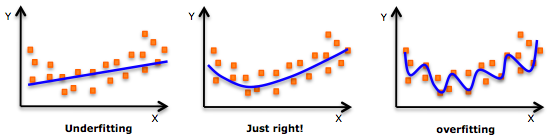
- You start with some arbitrary prediction function (a linear function for a Linear Regression Model)
- Use it on the independent features of the data to predict the output
- Calculate how far-off the predicted output is from the actual output
- Use these calculated values to optimize your prediction function using some strategy like Gradient Descent

**But wait – how can you calculate how different your prediction is from the expected output? Loss Functions, of course.**

A **loss function** is an application of the Vector Norm in Linear Algebra. The norm of a vector can simply be its magnitude. There are many types of vector norms. I will quickly explain two of them:

**L1 Norm**: Also known as the Manhattan Distance or Taxicab Norm. The L1 Norm is the distance you would travel if you went from the origin to the vector if the only permitted directions are parallel to the axes of the space.
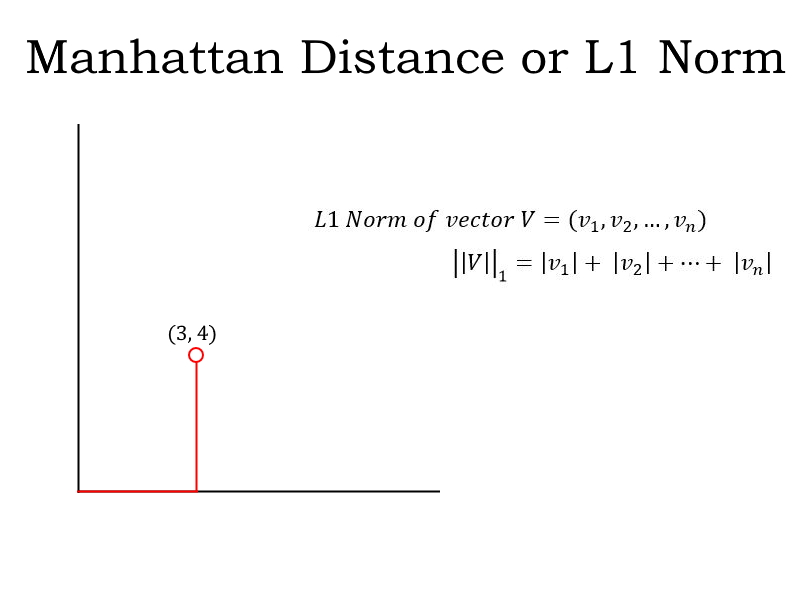

 **L2 Norm**:  Also known as the Euclidean Distance. L2 Norm is the shortest distance of the vector from the origin as shown by the red path in the figure below:
 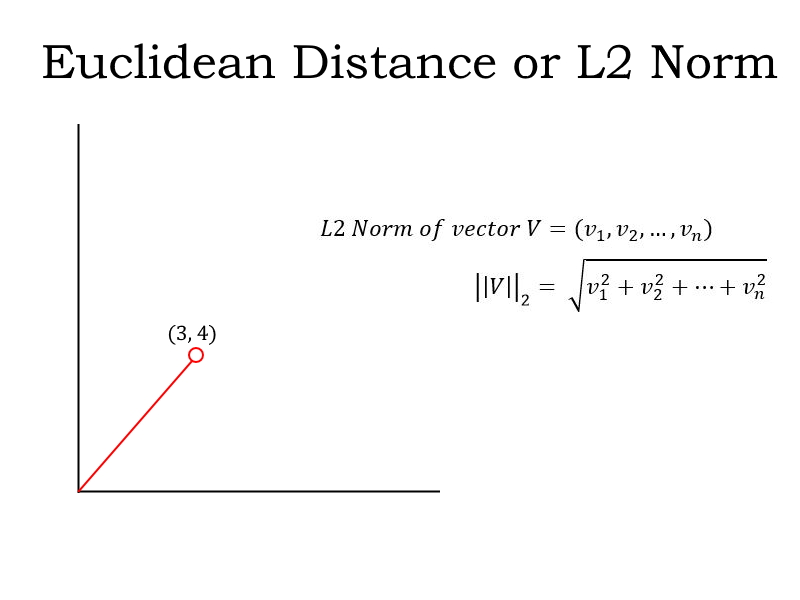

But how is the norm used to find the difference between the predicted values and the expected values? 
- Let’s say the predicted values are stored in a vector P and the expected values are stored in a vector E. Then P-E is the difference vector. And the norm of P-E is the total loss for the prediction.

# 2. Covariance Matrix

Bivariate analysis is an important step in data exploration. We want to study the relationship between pairs of variables. Covariance or Correlation are measures used to study relationships between two continuous variables.

Covariance indicates the direction of the linear relationship between the variables. A positive covariance indicates that an increase or decrease in one variable is accompanied by the same in another. A negative covariance indicates that an increase or decrease in one is accompanied by the opposite in the other.

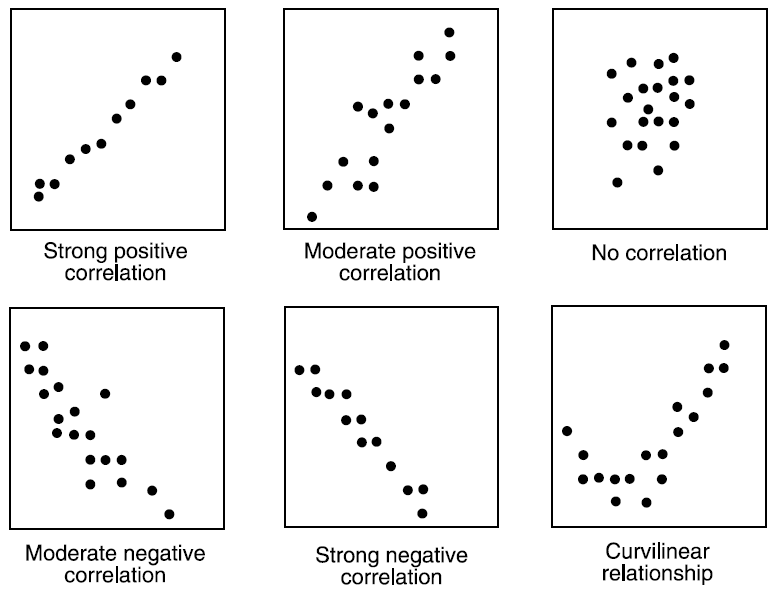

On the other hand, correlation is the standardized value of Covariance. A correlation value tells us both the strength and direction of the linear relationship and has the range from -1 to 1.

Now, you might be thinking that this is a concept of Statistics and not Linear Algebra. Well, remember I told you Linear Algebra is all-pervasive? 

Using the concepts of **transpose and matrix multiplication** in Linear Algebra, we have a pretty neat expression for the covariance matrix:
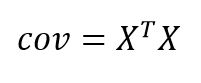
Here, X is the standardized data matrix containing all numerical features.

You are encouraged to read [the Tutorial on Data Exploration](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/?utm_source=blog&utm_medium=10-applications-linear-algebra-data-science) to know more about the Covariance Matrix, Bivariate Analysis and the other steps involved in Exploratory Data Analysis.

# 3. Support Vector Machine Classification

Ah yes, support vector machines. One of the most common classification algorithms that regularly produces impressive results. It is an application of the concept of Vector Spaces in Linear Algebra.

Support Vector Machine, or SVM, is a discriminative classifier that works by finding a decision surface. It is a supervised machine learning algorithm.

In this algorithm, we plot each data item as a point in an n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyperplane that differentiates the two classes very well i.e. with the maximum margin, which is C is this case.
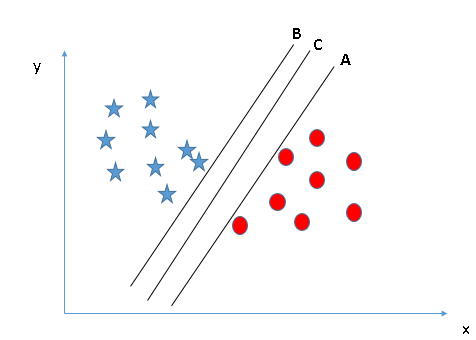

A hyperplane is a subspace whose dimensions are one less than its corresponding vector space, so it would be a straight line for a 2D vector space, a 2D plane for a 3D vector space and so on. Again Vector Norm is used to calculate the margin.

But what if the data is not linearly separable like the case below?
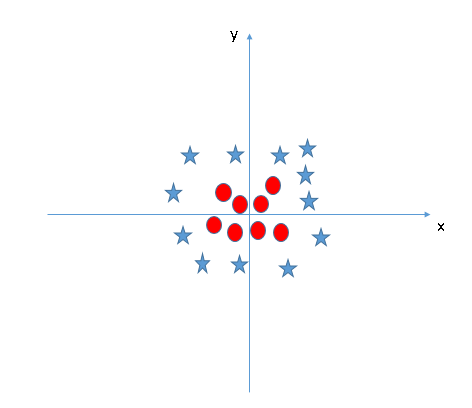

Our intuition says that the decision surface has to be a circle or an ellipse, right? But how do you find it? Here, the concept of Kernel Transformations comes into play. The idea of transformation from one space to another is very common in Linear Algebra.

Let’s introduce a variable z = x^2 + y^2. This is how the data looks if we plot it along the z and x-axes:
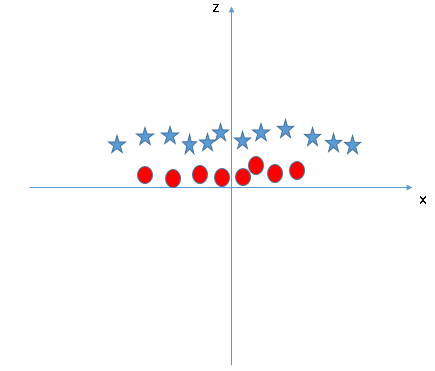

Now, this is clearly linearly separable by a line z = a, where a is some positive constant. On transforming back to the original space, we get x^2 + y^2 = a as the decision surface, which is a circle!
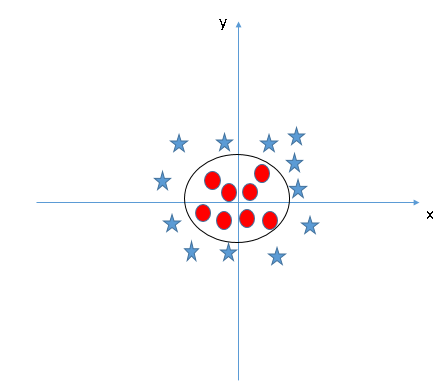

# 4. Dimensionality Reduction - Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is an unsupervised dimensionality reduction technique. PCA finds the directions of maximum variance and projects the data along them to reduce the dimensions.

Without going into the math, these directions are the [eigenvectors](https://www.youtube.com/watch?v=PFDu9oVAE-g&ab_channel=3Blue1Brown) of the covariance matrix of the data.
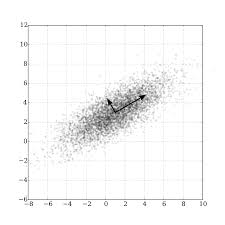

Eigenvectors for a square matrix are special non-zero vectors whose direction does not change even after applying linear transformation (which means multiplying) with the matrix.
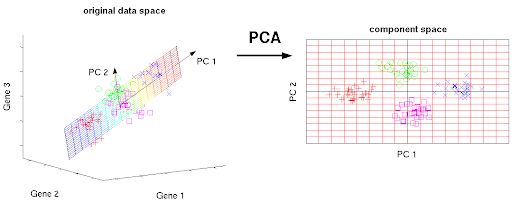

It is an orthogonal linear transformation that turns a set of possibly correlated variables into a new set of variables that are as uncorrelated as possible. The new variables lie in a new coordinate system such that the greatest variance is obtained by projecting the data in the first coordinate, the second greatest variance by projecting in the second coordinate, and so on. 

A step by step tutorial of PCA can be found [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

We’ll then break this matrix down into two separate components: direction and magnitude. We can then understand the “directions” of our data and its “magnitude” (or how “important” each direction is). The screenshot below, from the setosa.io applet, displays the two main directions in this data: the “red direction” and the “green direction.” 
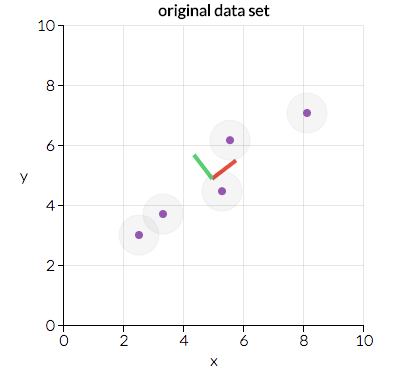
In this case, the “red direction” is the more important one. We’ll get into why this is the case later, but given how the dots are arranged, can you see why the “red direction” looks more important than the “green direction?” (Hint: What would fitting a line of best fit to this data look like?)

We will transform our original data to align with these **important directions** (which are combinations of our original variables). The screenshot below (again from setosa.io) is the same exact data as above, but transformed so that the x- and y-axes are now the “red direction” and “green direction.” What would the line of best fit look like here?
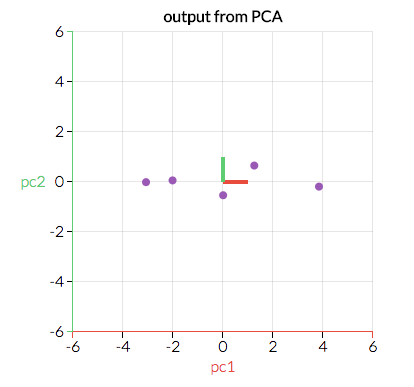

While the visual example here is two-dimensional (and thus we have two “directions”), think about a case where our data has more dimensions. By identifying which “directions” are most “important,” we can compress or project our data into a smaller space by dropping the “directions” that are the “least important.” 
- By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space… but because we’ve transformed our data in these different “directions,” we’ve made sure to keep all original variables in our model!

You can easily implement PCA in Python using the PCA class in the scikit-learn package:

In [28]:
from sklearn.decomposition import PCA
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()
X_digits, y_digits = digits.data, digits.target
 
n_row, n_col = 2, 5

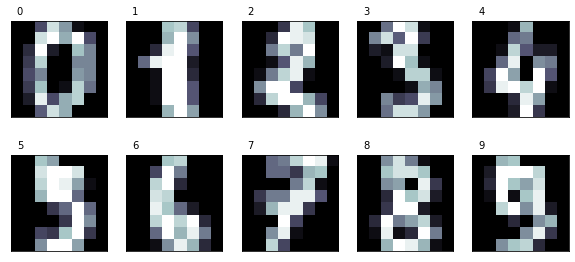

In [29]:
def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

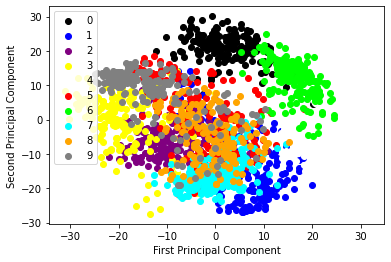

In [30]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
from sklearn.decomposition import PCA

estimator = PCA(n_components=5)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

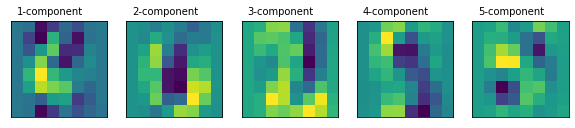

In [10]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

n_components=5
print_pca_components(estimator.components_[:n_components], n_col, n_row)

# 5. Convolution and Image Processing

2D Convolution is a very important operation in image processing. It consists of the below steps:

1. Start with a small matrix of weights, called a kernel or a filter
2. Slide this kernel on the 2D input data, performing element-wise multiplication
3. Add the obtained values and put the sum in a single output pixel

<div>
<center>
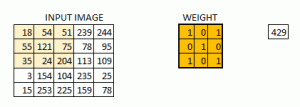
</center>
</div> 

The function can seem a bit complex but it’s widely used for performing various image processing operations like sharpening and blurring the images and edge detection. We just need to know the right kernel for the task we are trying to accomplish. Here are a few kernels you can use:
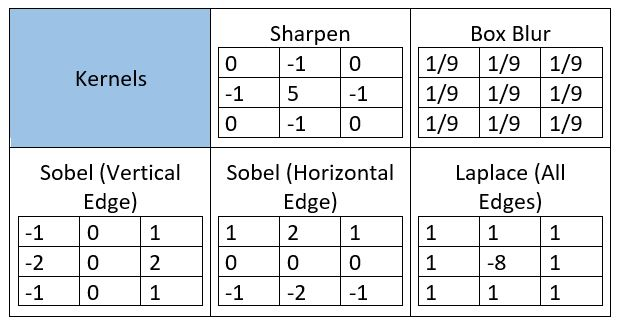

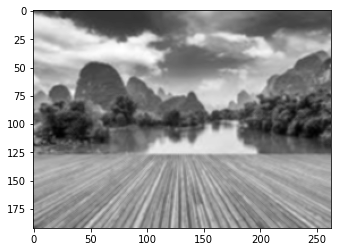

In [27]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from scipy import ndimage

# read the image
img = cv2.imread('1.jpeg')

# imread returns image in BRG format by default, convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to grayscale for 2D convolution
gray = rgb2gray(img)

kernel = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

output = ndimage.convolve(gray, kernel, mode='reflect') 
# The mode parameter determines how the input array is extended when the filter overlaps a border

# plot the output image
#plt.imshow(gray, cmap = 'gray')
plt.imshow(output, cmap = 'gray')

# 6. Adjacency Matrix to model a Graph

In [5]:
import numpy as np
friends=np.array([[0, 2],
       [0, 6],
       [1, 3],
       [4, 7],
       [5, 8],
       [6, 7]], dtype='int64')


([<matplotlib.axis.XTick at 0x7fb78eb1b850>,
 <a list of 9 Text xticklabel objects>)

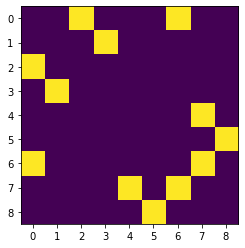

In [9]:
import matplotlib.pyplot as mpl
n=friends.max()
frdGraph = np.zeros((n+1,n+1))
frdGraph[friends[:,0],friends[:,1]]=1
frdGraph[friends[:,1],friends[:,0]]=1
mpl.imshow(frdGraph)
mpl.xticks(range(9))

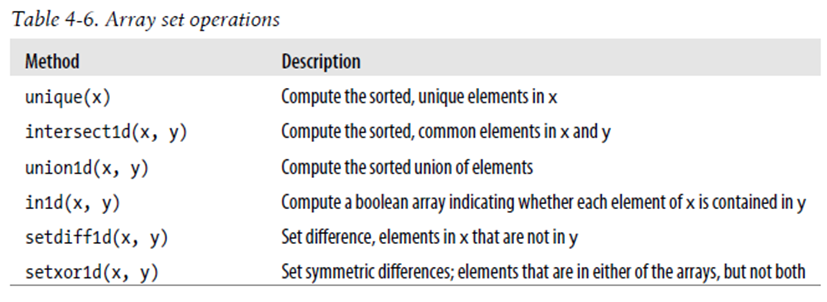

In [10]:
edgeList=np.array([['Amy', 'Frank'],
                   ['Amy', 'Katy'],
                   ['Emma', 'James'],
                   ['Cindy', 'Rose'],
                   ['Tim', 'John'],
                   ['Katy', 'Rose']], dtype='<U5')

In [11]:
names, indices = np.unique(edgeList, return_inverse=True)

In [12]:
names

array(['Amy', 'Cindy', 'Emma', 'Frank', 'James', 'John', 'Katy', 'Rose',
       'Tim'], dtype='<U5')

In [13]:
indices

array([0, 3, 0, 6, 2, 4, 1, 7, 8, 5, 6, 7])

In [14]:
np.reshape(indices,(-1, 2)).T

array([[0, 0, 2, 1, 8, 6],
       [3, 6, 4, 7, 5, 7]])

In [15]:
edgeList=np.array([['Amy', 'Frank'],
['Amy', 'Katy'],
['Emma', 'James'],
['Cindy', 'Rose'],
['Tim', 'John'],
['Katy', 'Rose']], 
dtype='<U5')

In [ ]:
names, indices = np.unique(edgeList, return_inverse=True)

In [ ]:
names

([<matplotlib.axis.XTick at 0x7fb78ee3f150>,
 <a list of 9 Text xticklabel objects>)

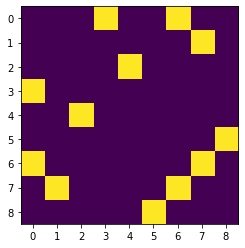

In [16]:
n = indices.max()
frdGraph2 = np.zeros((n+1,n+1))
frdGraph2[indices[::2], indices[1::2]] = 1
frdGraph2[indices[1::2], indices[::2]] = 1
mpl.imshow(frdGraph2)
mpl.xticks(range(n+1))